<a href="https://colab.research.google.com/github/Junyoo0706/Machine-Learning-Project/blob/main/ST1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Reading the data Reading the data with python


**Tesla**

The TESLA dataset contains 253 entries of stock price data with 7 attributes. The details are outlined below:

Date: The date of the recorded data.

Open: The opening price of the stock on that date.

High: The highest price of the stock on that date.

Low: The lowest price of the stock on that date.

Close: The closing price of the stock on that date.

Adj Close: The adjusted closing price of the stock on that date, which accounts for any corporate actions such as stock splits or dividends.

Volume: The volume of shares traded on that date.​​





In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Google Colab Project/TESLA.csv')
df2
df2['Day'] = range(1, len(df2) + 1)
df2


,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700,1
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,2
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,3
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,4
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,5
...,...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400,249
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,250
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,251
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,252


# Step 2 : Problem Statement Definition

**Tesla stock price research question**: What is the predicted value of Tesla stock's closing price over the 6 month time?

* Creating  a prediction model to wpredict the price( Close ) of a tesla pricing

* Target Variable: Close
Predictors/Features: Date, Open, High, Low, Close, Adj Close, Volume, Day.



## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.

**Look at step 5**


Tesla:
Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continious**.

# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.


**Tesla:**



<Axes: >

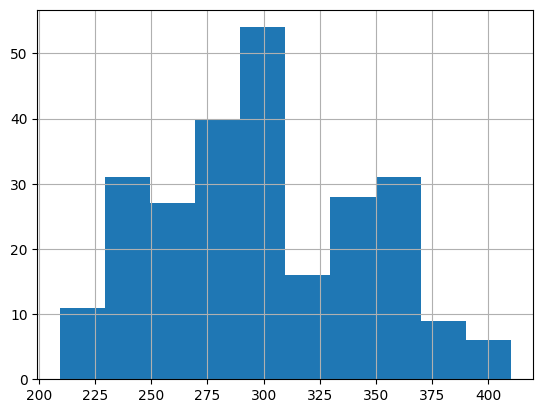

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
df2['Close'].hist()

**Step 5: Data exploration at basic level**

**Tesla stock prices**

# Observation-


*   Open : Continuous
*   High : Continuous
*   Low : Continuous
*   Close : Continuous
*   Adj Close : Continuous
*   Volume : Continuous

Most of your dataset showcased more than 20 so it is Continuous

In [ ]:
# Looking at sample rows in the data
df2.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700,1
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,2
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,3
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,4
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,5


**Tesla stock prices**

In [ ]:
# Looking at sample rows in the data
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Day
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400,249
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,250
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,251
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,252
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100,253


**Tesla stock prices**

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
 7   Day        253 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 15.9+ KB


**Tesla stock prices**

In [ ]:
# Looking at the descriptive statistics of the data
df2.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Day
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
unique,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07,127.000000
std,NaN,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07,73.179004
min,NaN,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07,1.000000
25%,NaN,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07,64.000000
50%,NaN,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07,127.000000
75%,NaN,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07,190.000000


In [ ]:
#Tesla stock number unqiue (continious)

df2.nunique()

,0
Date,253
Open,249
High,251
Low,251
Close,252
Adj Close,252
Volume,253
Day,253


**Step 6: Identifying and Rejecting useless columns**

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Google Colab Project/TESLA.csv')
df2
df2.drop(columns=['High', 'Low', 'Adj Close'], axis='columns', inplace=True)
df2
df2['Day'] = range(1, len(df2) + 1)
df2

,Date,Open,Close,Volume,Day
0,2021-09-29,259.933319,260.436676,62828700,1
1,2021-09-30,260.333344,258.493347,53868000,2
2,2021-10-01,259.466675,258.406677,51094200,3
3,2021-10-04,265.500000,260.510010,91449900,4
4,2021-10-05,261.600006,260.196655,55297800,5
...,...,...,...,...,...
248,2022-09-23,283.089996,275.329987,63615400,249
249,2022-09-26,271.829987,276.010010,58076900,250
250,2022-09-27,283.839996,282.940002,61925200,251
251,2022-09-28,283.079987,287.809998,54664800,252


## Step 7 : Visual Exploratory Data Analysis

# **With testing it shows below that is not needed since there are no catagorical variables**

Observations from Step 8 - Visual Exploratory Data Analysis

Tesla since there are not catagorical variables we can skip this step

## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

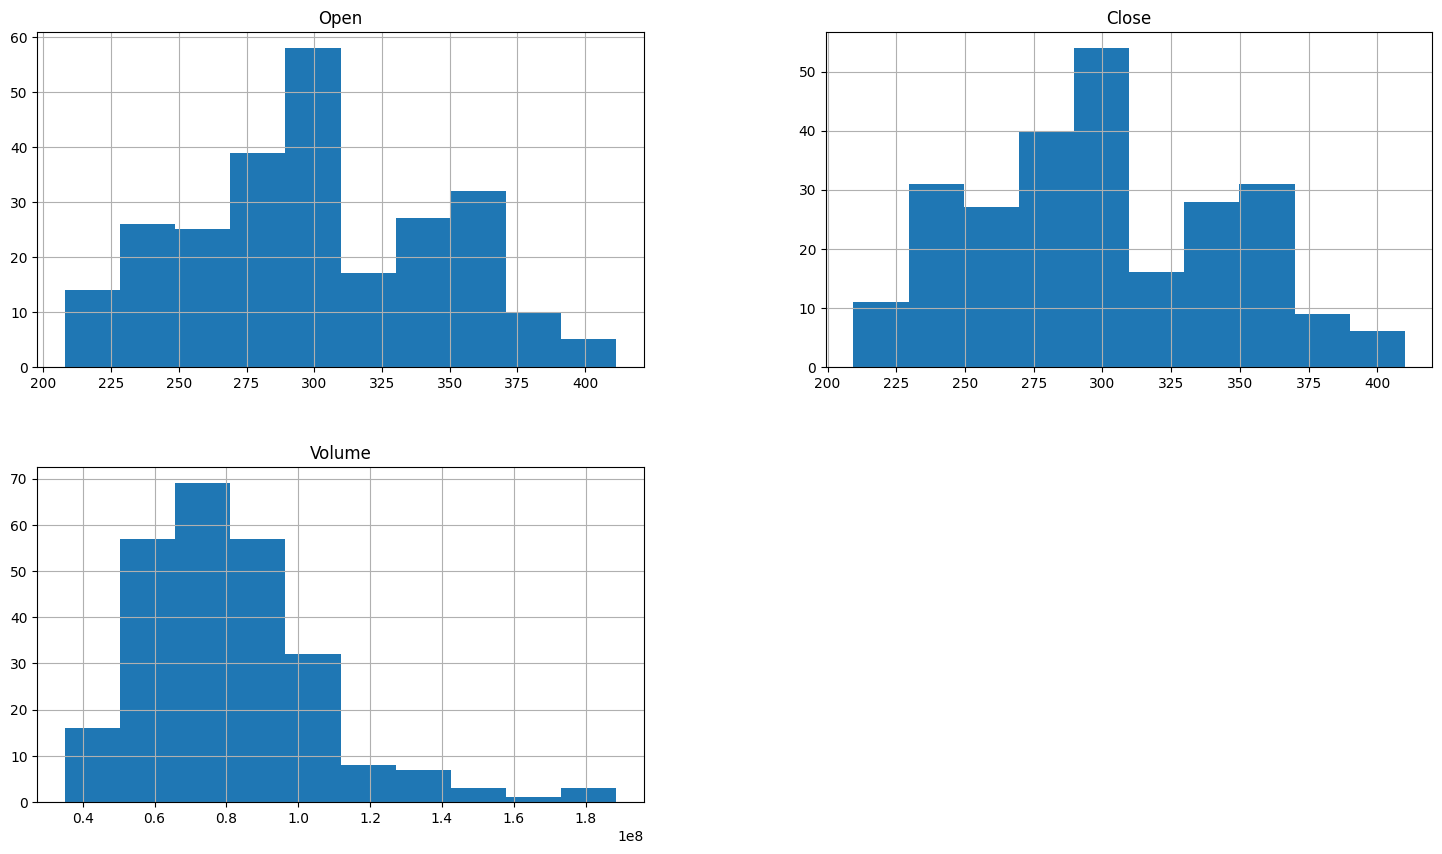

In [ ]:
# Plotting histograms of multiple columns together
df2.hist(['Date', 'Open', 'Close', 'Volume' ], figsize=(18,10))

## Observations from Step 9


* Histogram Interpretation
* Each histogram provides a visual representation of the distribution of the "Volume" data, which is a continuous variable.

* X-axis: Represents the range of trading volumes (scaled to *10^8).
* Y-axis: Represents the number of trading days that fall within each volume range.
* For example, in the above histograms, there are around 65-70 trading days where the volume was between 0.6 * 10^8 and 0.8 * 10^8.


## Step 10: Outlier Analysis


**There are no outliers in this dataset so we don't need this step**

## Step 11: Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'Close'}>]], dtype=object)

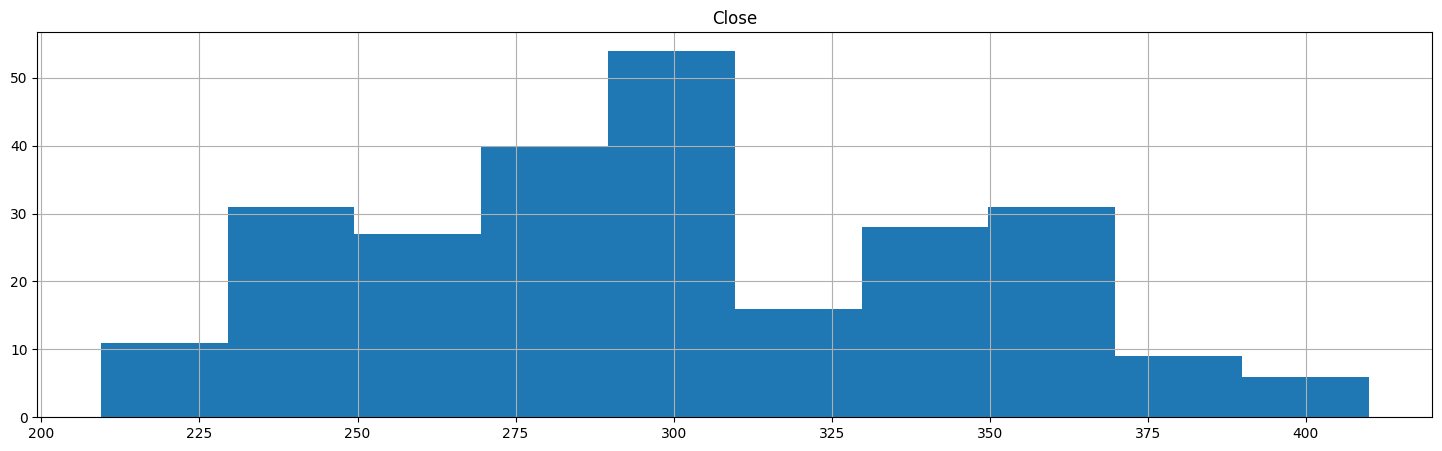

In [ ]:
df2.hist(['Close'], figsize=(18,5))

It is already accpetable

## Step 12: Missing Values Analysis

In [ ]:
# Finding how many missing values are there for each column
df2.isnull().sum()

,0
Date,0
Open,0
Close,0
Volume,0
Day,0


##Observations from Step 12: Missing Value Analysis

* No missing values in this data
* So no removal of any data samples(rows) is needed.


## Step 13: Feature Selection (Attribute Selection)


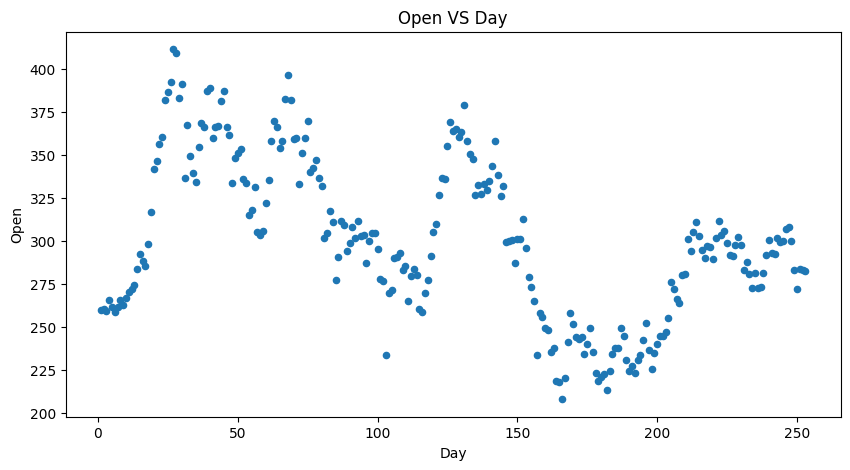

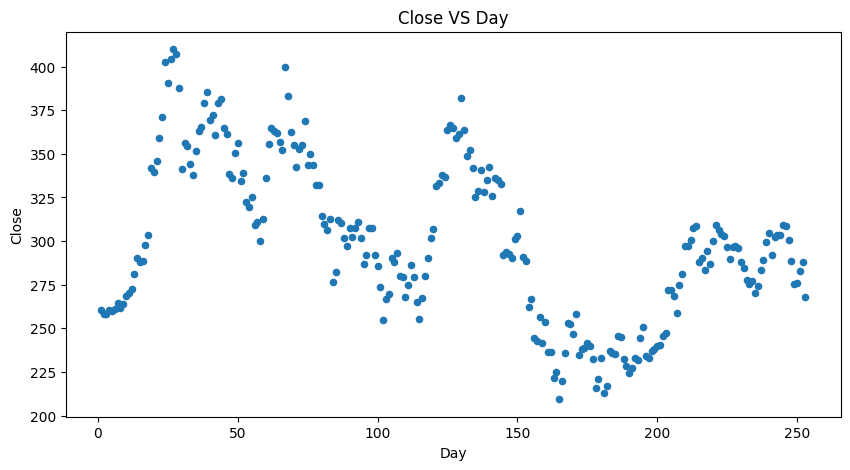

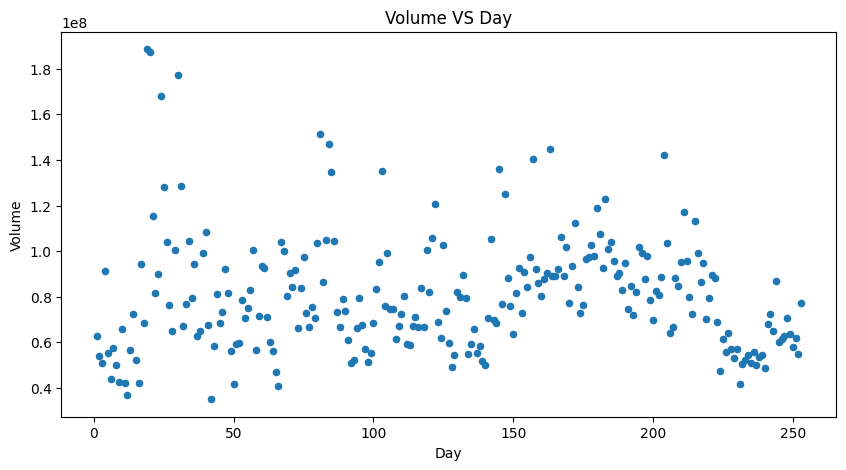

In [ ]:
ContinuousCols=['Open', 'Close', 'Volume']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df2.plot.scatter(y=predictor, x='Day', figsize=(10,5), title=predictor+" VS "+ 'Day')

**Observation**

Since there is only Continuous Vs Continuous is likely to use a Scatter Plot


Open VS Day

Close Vs Day

Volume VS Day



*   We can see is a Decreasing Trend since some days is increased the prices of Tesla while it can end or open at a higher or lower prices meanwhile Volume doesn't matter.




**Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Open', 'Close', 'Volume']

# Creating the correlation matrix
CorrelationData=df2[ContinuousCols].corr()
CorrelationData

,Open,Close,Volume
Open,1.000000,0.971783,-0.047793
Close,0.971783,1.000000,-0.047791
Volume,-0.047793,-0.047791,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Close'][abs(CorrelationData['Close']) > 0.5 ]

,Close
Open,0.971783
Close,1.000000


## Observations from Step 14
* Final selected Continuous columns:

* **'Open', 'Close','Volume'**



*   Open because we need to know when does the Tesla stock prices open at
*   Close because we also need to know what value and the research quesiton about the Tesla stock is closing at
*  Finally volume is needed to show how many stocks remind or is there



# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots


**Not needed since this data is Continuous and Continuous **

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

** We don't need this either **

## Selecting final Predictors/Features for building Machine Learning/AI model.

In [ ]:
SelectedColumns=['Open', 'Close', 'Volume']

# Selecting final columns
DataForML=df2[SelectedColumns]
DataForML.head()

,Open,Close,Volume
0,259.933319,260.436676,62828700
1,260.333344,258.493347,53868000
2,259.466675,258.406677,51094200
3,265.500000,260.510010,91449900
4,261.600006,260.196655,55297800


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForTesla.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development

## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Close']=df2['Close']

# Printing sample rows
DataForML_Numeric.head()

,Open,Close,Volume
0,259.933319,260.436676,62828700
1,260.333344,258.493347,53868000
2,259.466675,258.406677,51094200
3,265.500000,260.510010,91449900
4,261.600006,260.196655,55297800


## Step 18: Machine Learning Model Development:


In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Open', 'Close', 'Volume'], dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Close'
Predictors=['Open', 'Close', 'Volume']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 19: Standardization/Normalization of data

**Don't need to fill in**

## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

Along with Multiple Linear Regression we have used "Decision Tree Regressor" and "K-Nearest Neighbor(KNN)" along with it best one to use is Multiple Linear Regression since is 99.9



*   Multiple Linear Regression: 99.9
*   Decision Tree Regressor: 99.3
*   K-Nearest Neighbor (KNN): 84.13



In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ##########
         Open       Close       Volume  PredictedClose
0  260.333344  258.493347   53868000.0           258.0
1  297.066681  294.356659   94918800.0           294.0
2  386.453339  390.666656  128213400.0           391.0
3  276.809998  254.679993   95256900.0           255.0
4  356.103333  359.013336   81639600.0           359.0
Mean Accuracy on test data: 99.92139535912256
Median Accuracy on test data: 99.91694764058434

Accuracy values for 10-fold Cross Validation:
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9987561529584857

##### Model Validation and Accuracy Calculations ##########
         Open       Close       Volume  PredictedClose
0  260.333344  258.493347   53868000.0           260.0
1  297.066681  294.356659   94918800.0           296.0
2  386.453339  390.666656  128213400.0           387.0
3  276.809998  254.679993   95256900.0           255.0
4  356.103333  359.013336   81639600.0           364.0
Mean Accuracy on test data: 99.37763293770313
Median Accuracy on test data: 99.4765669660219

Accuracy values for 10-fold Cross Validation:
 [99.39130116 99.27168834 99.39842275 99.3848044  99.44064636 99.37163288
 99.02220665 98.83378512 99.51194744 99.49358832]

Final Average Accuracy of the model: 99.31


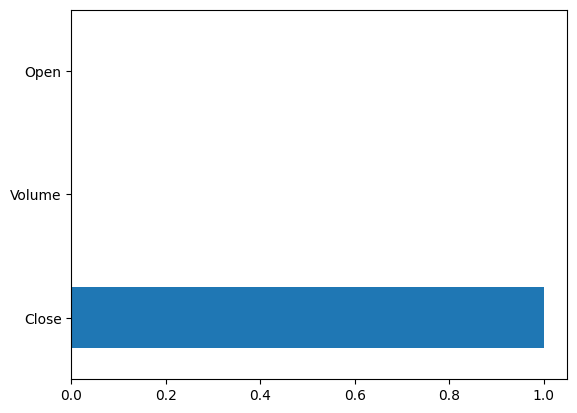

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.3752665608802499

##### Model Validation and Accuracy Calculations ##########
         Open       Close       Volume  PredictedClose
0  260.333344  258.493347   53868000.0           309.0
1  297.066681  294.356659   94918800.0           273.0
2  386.453339  390.666656  128213400.0           295.0
3  276.809998  254.679993   95256900.0           281.0
4  356.103333  359.013336   81639600.0           315.0
Mean Accuracy on test data: 84.39749844770283
Median Accuracy on test data: 87.7496466735584

Accuracy values for 10-fold Cross Validation:
 [83.84696455 81.88448184 84.17878071 90.86109072 87.07597142 88.84714792
 74.67898767 69.8685975  89.94517974 90.06831673]

Final Average Accuracy of the model: 84.13


# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9999970862734635

##### Model Validation and Accuracy Calculations ##########
         Open       Close       Volume  PredictedClose
0  260.333344  258.493347   53868000.0           258.0
1  297.066681  294.356659   94918800.0          

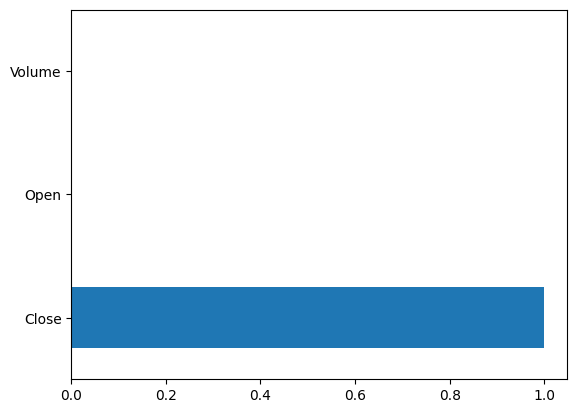

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

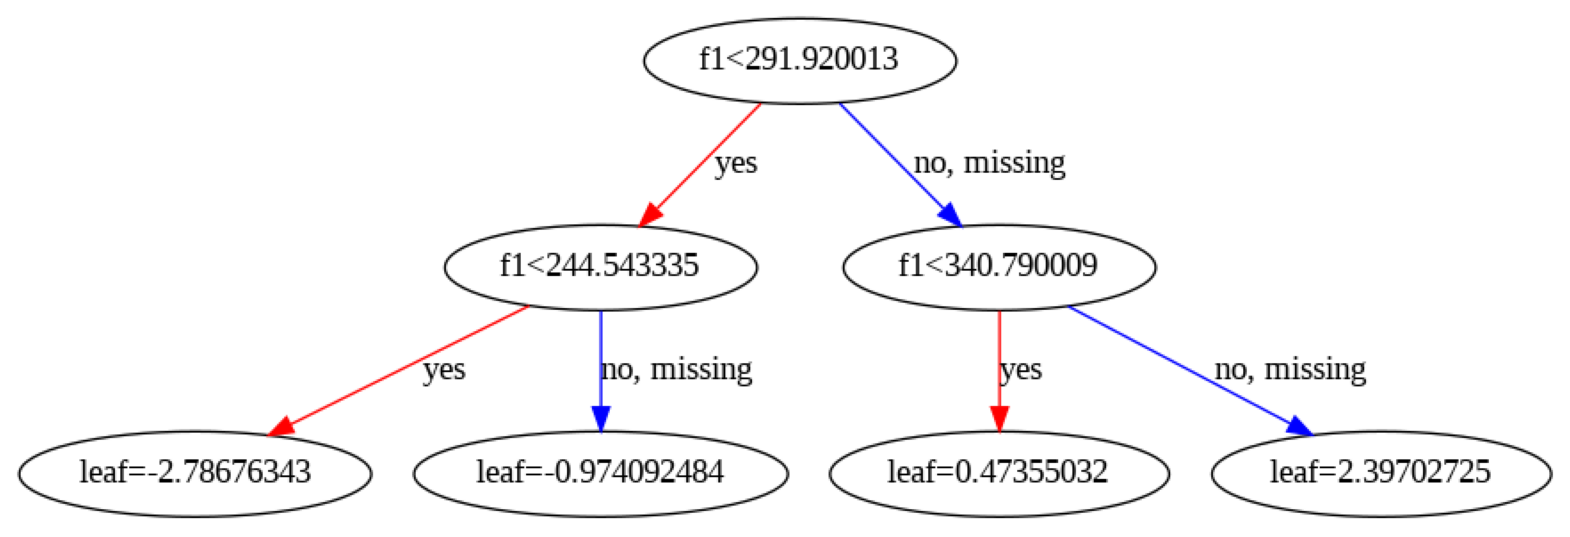

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# Plotting/Visualising the Decision Tree

# **If you want to look at the entire image please right click and click "Open to New Tab" to see the full image**

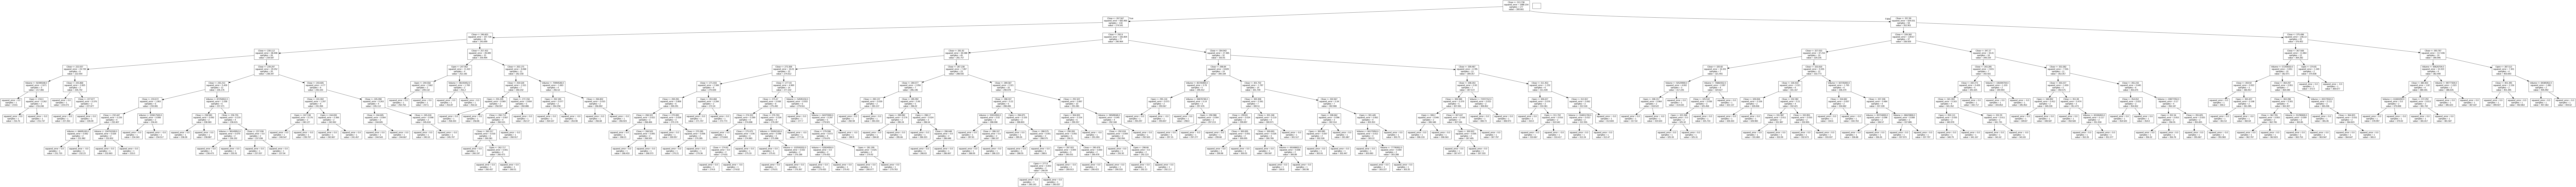

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Assuming 'DecisionTreeRegressor' is the appropriate model for your problem:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor()
RegModel.fit(X_train, y_train)

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors,
                                class_names=None) # Change this to None for a regression problem

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=500,height=500)
# Double click on the graph to zoom in

# Step 21: Model Deployment

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Close'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Open', 'Close', 'Volume']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)


(253, 3)
(253,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [99.40213833 99.42973374 99.62592417 99.60370901 99.63381628 99.60217865
 99.3634958  99.34365799 99.73759119 99.70852409]

Final Average Accuracy of the model: 99.55


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_ModelTesla.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


# Step 24: Create a python function

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle


def FunctionPredictResult(InputData):
    Num_Inputs = InputData.shape[0]

    # Load the training data
    DataForML = pd.read_pickle('DataForTesla.pkl')

    # Concatenate new data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generate dummy variables for nominal variables
    InputData = pd.get_dummies(InputData)

    # Ensure the columns are in the same order as the training data
    Predictors = ['Open', 'Close', 'Volume']  # Adjust based on the actual predictors used in training

    # Align the columns with the predictors used in the model
    X = InputData[Predictors].values[0:Num_Inputs]

    # Standardization (Ensure to load the scaler used in training if it was applied)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Load the trained model
    with open('Final_XGB_ModelTesla.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Generate predictions
    Prediction = PredictionModel.predict(X)
    PredictionResult = pd.DataFrame(Prediction, columns=['Prediction'])

    return PredictionResult


# Step 25 Calling the function for some new data

In [ ]:
NewSampleData = pd.DataFrame(data=[
    [259.933319, 260.436676, 62828700],
    [260.333344, 258.493347, 53868000]
], columns=['Open', 'Close', 'Volume'])

print(NewSampleData)


         Open       Close    Volume
0  259.933319  260.436676  62828700
1  260.333344  258.493347  53868000


#  Step 26: Desktop App deployment: Tkinter package
* Will not work on Google Colab.
* Need to use PyCharm to run this code.
* Make sure you include the data file (Tesla.csv)

In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class TeslaStockPredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Tesla Stock Price Prediction')

        # Increase application size
        self.master.geometry("500x400")

        # Add a title at the top
        title_label = tk.Label(self.master, text='Tesla Stock Price Prediction', font=('Arial', 16))
        title_label.pack(pady=10)

        # Load the Tesla data
        self.data = pd.read_csv('TESLA.csv')
        self.features = ['Open', 'High', 'Low', 'Volume']
        self.X = self.data[self.features].values
        self.y = self.data['Close'].values

        # Split the data into training and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Train the model
        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        # Create a frame for padding
        self.frame = tk.Frame(self.master, padx=20, pady=20)
        self.frame.pack()

        # Create GUI widgets
        self.sliders = []
        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.features):
            label = tk.Label(self.frame, text=column + ': ')
            label.grid(row=i, column=0, sticky='w')
            current_val_label = tk.Label(self.frame, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.frame, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1, padx=10, pady=5)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.frame, text='Predict Closing Price', command=self.predict_price)
        predict_button.grid(row=len(self.features), columnspan=3, pady=10)

        # Label to display prediction below the button
        self.prediction_label = tk.Label(self.frame, text='', font=('Arial', 14), fg='blue')
        self.prediction_label.grid(row=len(self.features) + 1, columnspan=3, pady=10)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        predicted_close = self.model.predict([inputs])
        self.prediction_label.config(text=f'Predicted Closing Price: ${predicted_close[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = TeslaStockPredictionApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable



-------------------------------------





----

# **Airbnb Project**

**Airbnb Price Prediction**


The Airbnb dataset contains 74,111 entries of property details with 29 attributes.

id: Unique identifier for the listing.

log_price: Logarithm of the price of the listing.

property_type: Type of property (e.g., Apartment, House).

room_type: Type of room (e.g., Entire home/apt, Private room).

amenities: List of amenities provided.

accommodates: Number of people the listing accommodates.

bathrooms: Number of bathrooms.

bed_type: Type of bed (e.g., Real Bed).

cancellation_policy: Cancellation policy of the listing.

cleaning_fee: Indicates if there is a cleaning fee.

city: City where the listing is located.

description: Description of the listing.

first_review: Date of the first review.

host_has_profile_pic: Indicates if the host has a profile picture.

host_identity_verified: Indicates if the host's identity is verified.

host_response_rate: Response rate of the host.

host_since: Date since the host is active.

instant_bookable: Indicates if the listing is instant bookable.

last_review: Date of the last review.

latitude: Latitude coordinate of the listing.

longitude: Longitude coordinate of the listing.

name: Name of the listing.

neighbourhood: Neighbourhood of the listing.

number_of_reviews: Number of reviews the listing has received.

review_scores_rating: Rating score of the listing.

thumbnail_url: URL of the thumbnail image.

zipcode: Zipcode of the listing.

bedrooms: Number of bedrooms.

beds: Number of beds. ​​



**Step 1: Reading the data**

In [ ]:

dfAirbnb = pd.read_csv('/content/drive/MyDrive/Google Colab Project/train.csv') # Read data file
dfAirbnb = dfAirbnb[(dfAirbnb['property_type'] == 'Apartment') & (dfAirbnb['city'] == 'NYC') & (dfAirbnb['bed_type'] == 'Real Bed') & (dfAirbnb['room_type'] == 'Entire home/apt')]  # create dataframe for NYC Appartments

dfAirbnb

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
18,17589436,4.882802,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,...,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0
25,14122244,5.003946,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,...,40.692057,-73.745464,JFK LUXURIOUS APARTMENT,Jamaica,14,100.0,https://a0.muscache.com/im/pictures/095186d9-1...,11411.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74071,64574,5.241747,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,flexible,False,...,40.771678,-73.922203,"Beautiful, bright, serene Astoria 1 bedroom",Astoria,0,NaN,https://a0.muscache.com/im/pictures/9cbe7e51-f...,11102,1.0,1.0
74091,3779249,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,False,...,40.726571,-73.987138,East Village studio,East Village,5,100.0,https://a0.muscache.com/im/pictures/5d56c2fa-8...,10009.0,0.0,1.0
74095,2278677,4.382027,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,...,40.617641,-74.028205,"Bayridge, Brooklyn 1 bedroom apt",Bay Ridge,0,NaN,NaN,11209,1.0,1.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


**Step 2: Problem Statement Definition**

**Airbnb research question**: What is the predicted price of a full Airbnb apartment in NYC?



*   This project aims to predict the price (log_price) of full Airbnb apartments in New York City.




**Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis**


Based on the problem statement we need to create a supervised ML Regression model, as the target variable (log_price) is **Continuous**.


**Step 4: Visualising the distribution of Target variable**

<Axes: title={'center': 'Distribution of Airbnb Price'}, xlabel='Price in Thousands of USD', ylabel='Listing Volume'>

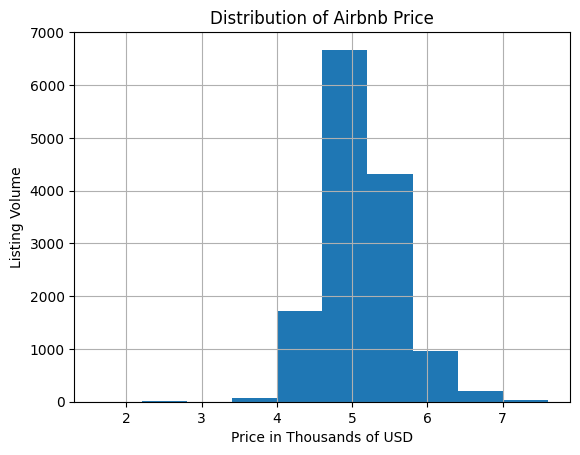

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
plt.title('Distribution of Airbnb Price')
plt.xlabel('Price in Thousands of USD')
plt.ylabel('Listing Volume')
dfAirbnb['log_price'].hist()


**Distribution Observations**
 * Based on the above chart we can the data is distributed in a satifactory bell curve.
 * There are no major outliers

**Step 5: Data exploration at basic level**

First we display the first five rows of our data using the head function.

In [ ]:
dfAirbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
18,17589436,4.882802,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,...,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0
25,14122244,5.003946,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,...,40.692057,-73.745464,JFK LUXURIOUS APARTMENT,Jamaica,14,100.0,https://a0.muscache.com/im/pictures/095186d9-1...,11411.0,3.0,3.0


We display the last 5 rows of our data using the tail function.

In [ ]:
dfAirbnb.tail()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74071,64574,5.241747,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,flexible,False,...,40.771678,-73.922203,"Beautiful, bright, serene Astoria 1 bedroom",Astoria,0,NaN,https://a0.muscache.com/im/pictures/9cbe7e51-f...,11102,1.0,1.0
74091,3779249,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,False,...,40.726571,-73.987138,East Village studio,East Village,5,100.0,https://a0.muscache.com/im/pictures/5d56c2fa-8...,10009.0,0.0,1.0
74095,2278677,4.382027,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,...,40.617641,-74.028205,"Bayridge, Brooklyn 1 bedroom apt",Bay Ridge,0,NaN,NaN,11209,1.0,1.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


We use the info function to find the data type, nulls and columns for our data.

In [ ]:
dfAirbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13976 entries, 0 to 74109
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13976 non-null  int64  
 1   log_price               13976 non-null  float64
 2   property_type           13976 non-null  object 
 3   room_type               13976 non-null  object 
 4   amenities               13976 non-null  object 
 5   accommodates            13976 non-null  int64  
 6   bathrooms               13946 non-null  float64
 7   bed_type                13976 non-null  object 
 8   cancellation_policy     13976 non-null  object 
 9   cleaning_fee            13976 non-null  bool   
 10  city                    13976 non-null  object 
 11  description             13976 non-null  object 
 12  first_review            11386 non-null  object 
 13  host_has_profile_pic    13911 non-null  object 
 14  host_identity_verified  13911 non-null  obj

Using the describe function we are able to see more details about our data for each column.


In [ ]:
dfAirbnb.describe(include='all')

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,1.397600e+04,13976.000000,13976,13976,13976,13976.000000,13946.000000,13976,13976,13976,...,13976.000000,13976.000000,13976,13975,13976.000000,11204.000000,12952,13774,13944.000000,13963.000000
unique,NaN,NaN,1,1,12973,NaN,NaN,1,4,2,...,NaN,NaN,13874,163,NaN,NaN,12952,235,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,...,NaN,NaN,Charming East Village Apartment,Williamsburg,NaN,NaN,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11211.0,NaN,NaN
freq,NaN,NaN,13976,13976,55,NaN,NaN,13976,6956,10998,...,NaN,NaN,5,1102,NaN,NaN,1,588,NaN,NaN
mean,1.129378e+07,5.120982,NaN,NaN,NaN,3.521179,1.101319,NaN,NaN,NaN,...,40.732832,-73.965349,NaN,NaN,18.178950,93.750089,NaN,NaN,1.206540,1.815727
std,6.102540e+06,0.503424,NaN,NaN,NaN,1.789889,0.328063,NaN,NaN,NaN,...,0.047850,0.032830,NaN,NaN,31.093992,7.496902,NaN,NaN,0.840213,1.087323
min,2.404000e+03,1.609438,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,40.508729,-74.239140,NaN,NaN,0.000000,20.000000,NaN,NaN,0.000000,1.000000
25%,6.222513e+06,4.787492,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,40.700324,-73.988415,NaN,NaN,1.000000,91.000000,NaN,NaN,1.000000,1.000000
50%,1.234451e+07,5.075174,NaN,NaN,NaN,3.000000,1.000000,NaN,NaN,NaN,...,40.729454,-73.968004,NaN,NaN,5.000000,96.000000,NaN,NaN,1.000000,2.000000
75%,1.641743e+07,5.393628,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,...,40.763996,-73.948708,NaN,NaN,21.000000,100.000000,NaN,NaN,2.000000,2.000000


To find how many unique values are used for each column we use the nunique function.





In [ ]:
dfAirbnb.nunique()

,0
id,13976
log_price,459
property_type,1
room_type,1
amenities,12973
accommodates,16
bathrooms,11
bed_type,1
cancellation_policy,4
cleaning_fee,2


**Observations from Step 5 - Basic Exploratory Data Analysis**

Based on the above we can determine the Continuous, Qualitative and Catagorical columns and select the columns we want to keep.

* id Qualitative **Not Selected**

* log_price Continuous Selected - This is the target variable

* property_type Catagorical **Not Selected**

* room_type Catagorical **Not Selected**

* amenities Continuous Selected

* accommodates Catagorical Selected

* bathrooms Catagorical Selected

* bed_type Catagorical Selected

* cancellation_policy Catagorical **Not Selected**

* cleaning_fee Catagorical Selected

* city Catagorical Selected

* description Qualitative **Not Selected**

* first_review Continuous **Not Selected**

* host_has_profile_pic Catagorical **Not Selected**

* host_identity_verified Catagorical **Not Selected**

* host_response_rate Continuous **Not Selected**

* host_since Continuous **Not Selected**

* instant_bookable Catagorical **Not Selected**

* last_review Continuous **Not Selected**

* latitude Continuous **Not Selected**

* longitude Continuous **Not Selected**

* name Qualitative **Not Selected**

* neighbourhood Continuous Selected

* number_of_reviews Continuous **Not Selected**

* review_scores_rating Continuous Selected

* thumbnail_url Continuous **Not Selected**

* zipcode Continuous Selected

* bedrooms Catagorical Selected

* beds Catagorical Selected


**Step 6: Removing Unwanted columns**
* There are two qualitative columns in the data that need to be removed.
* 'name' and 'description'.
* Additional columns that need to be removed include cancellation_policy, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, number_of_reviews, thumbnail_url, property_type, room_type, bed_type.
* These columns are being removed because they either are not relevant or will not have an effect on Airbnb price.

In [ ]:
dfAirbnb.drop(columns=['name','description', 'cancellation_policy', 'last_review', 'latitude', 'longitude', 'number_of_reviews', 'thumbnail_url',
                       'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable',
                       'property_type', 'room_type', 'bed_type', 'id'],   axis='columns', inplace=True)
dfAirbnb

,log_price,amenities,accommodates,bathrooms,cleaning_fee,city,neighbourhood,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,True,NYC,Brooklyn Heights,100.0,11201,1.0,1.0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,True,NYC,Hell's Kitchen,93.0,10019,3.0,3.0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,True,NYC,Harlem,92.0,10027,1.0,3.0
18,4.882802,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,True,NYC,Lower East Side,86.0,10002,1.0,2.0
25,5.003946,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,True,NYC,Jamaica,100.0,11411.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
74071,5.241747,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,False,NYC,Astoria,NaN,11102,1.0,1.0
74091,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,False,NYC,East Village,100.0,10009.0,0.0,1.0
74095,4.382027,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,False,NYC,Bay Ridge,NaN,11209,1.0,1.0
74108,5.220356,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,True,NYC,Williamsburg,94.0,11206.0,2.0,2.0


**Step 7: Visual Exploratory Data Analysis**

First we create the function to display our Catagorical predictor columns in a bar chart.

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    #fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

We call the bar chart functions using our columns

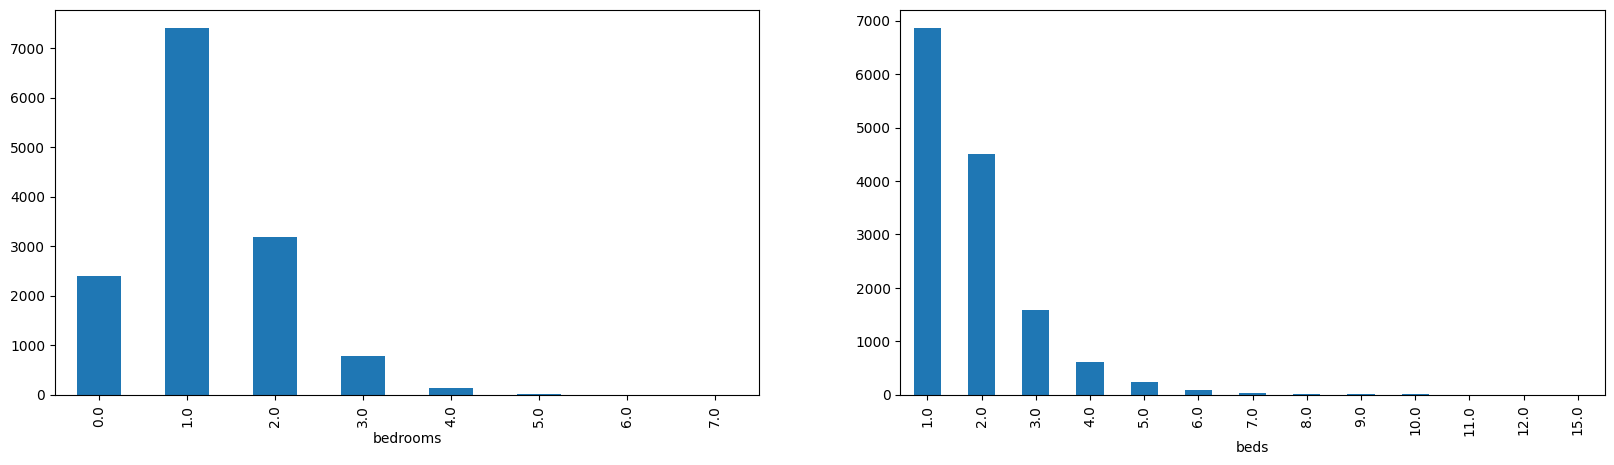

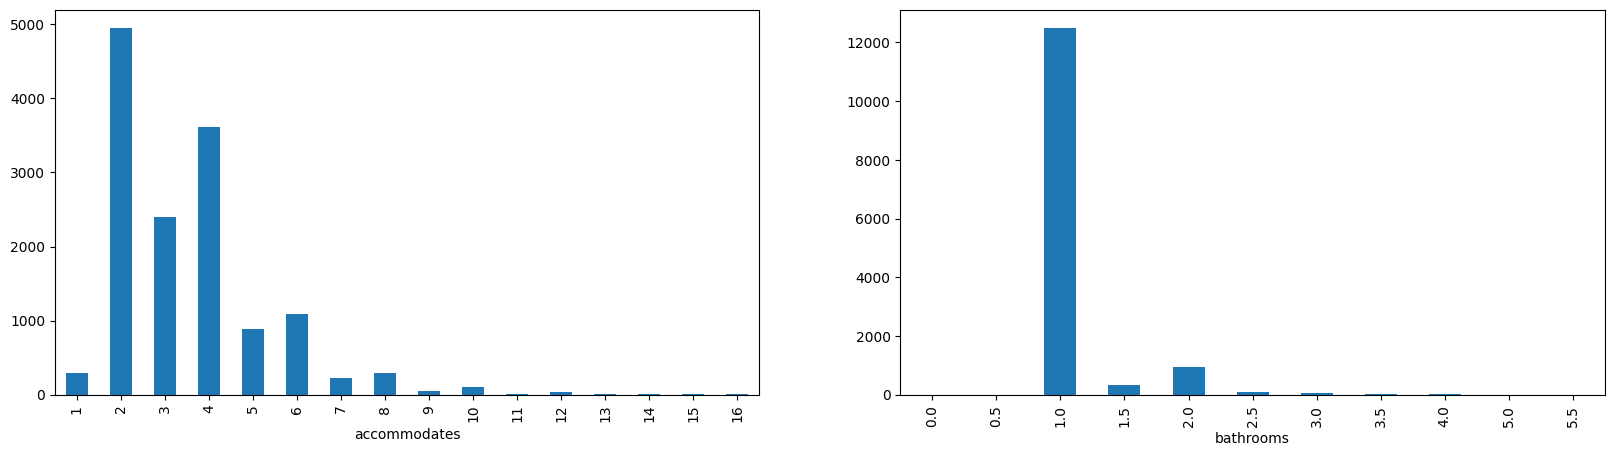

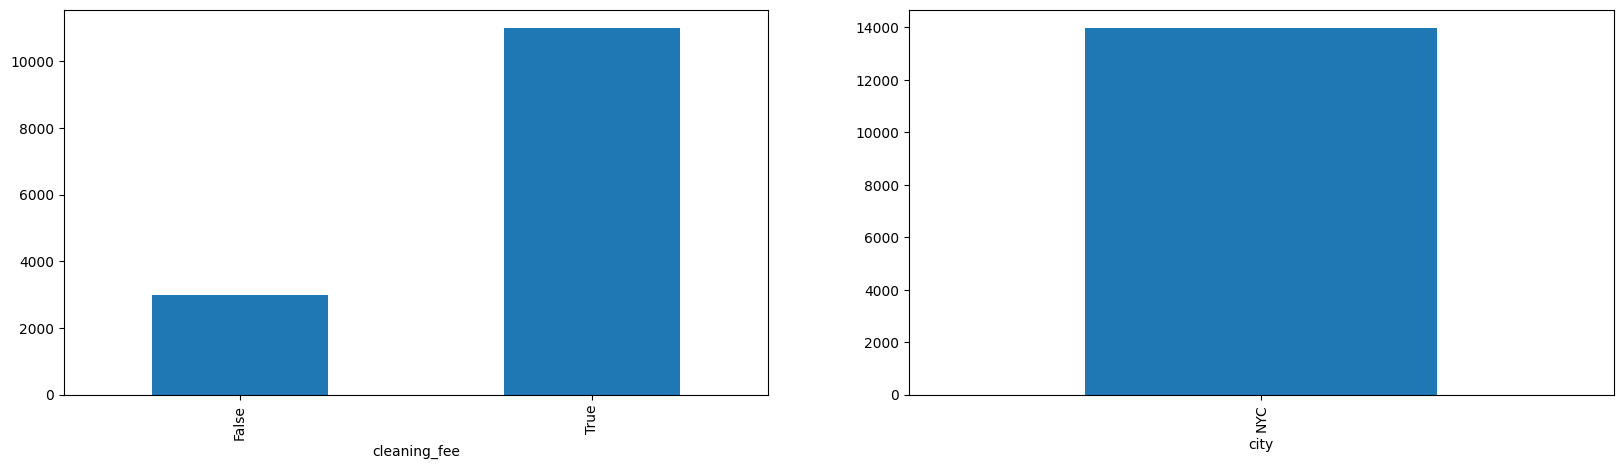

In [ ]:
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=dfAirbnb, colsToPlot=['bedrooms', 'beds'])
PlotBarCharts(inpData=dfAirbnb, colsToPlot=['accommodates', 'bathrooms'])
PlotBarCharts(inpData=dfAirbnb, colsToPlot=['cleaning_fee', 'city'])



**Observations from Step 7 - Visual Exploratory Data Analysis**

**accommodates:** Nearly 40% of the listings accommodates only 2 people by far the largest group. Only 1, 2, 3 and 4 options had more than 5000 listings. This chart is mostly distributed evenly with outliers.


**bathrooms:** This chart is heavily skewed with most listings having only 1 bathroom.


**cleaning_fee:** This chart show that there are significantly more listings with cleaning fees.


**city:** This chart has 1 option.


**bedrooms:** The majority of the listings are 1 bedroom. This chart is skewed.


**beds:**  The majority of the listings have 1 bed. This chart is skewed.


**bed_type:** This chart is heavily skewed with almost all listings having a real bed.

**Step 8: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms**

array([[<Axes: title={'center': 'review_scores_rating'}>]], dtype=object)

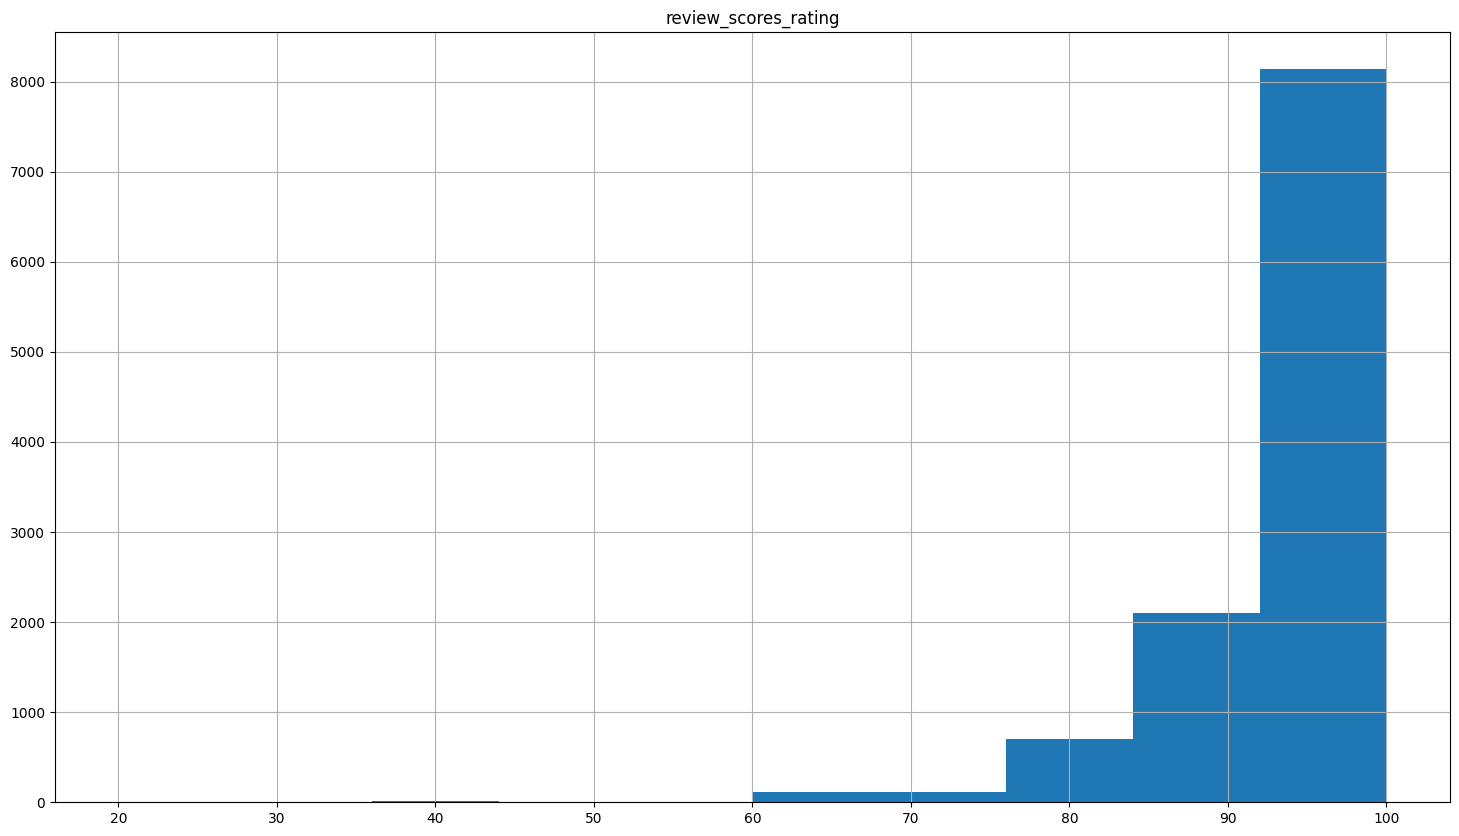

In [ ]:
dfAirbnb.hist(['amenities', 'neighbourhood', 'review_scores_rating', 'zipcode'], figsize=(18,10))

**Step 8 Analysis:**

* Of the four continuous predictive variables in the data only the review_scores_rating is able to be displayed in a histogram.

* The review_scores_rating is heavily skewed towards 100.

* We need to remove the amenities, neighbourhood and zipcode columns

In [ ]:
dfAirbnb.drop(columns=['amenities', 'zipcode', 'neighbourhood'],   axis='columns', inplace=True)
dfAirbnb

,log_price,accommodates,bathrooms,cleaning_fee,city,review_scores_rating,bedrooms,beds
0,5.010635,3,1.0,True,NYC,100.0,1.0,1.0
1,5.129899,7,1.0,True,NYC,93.0,3.0,3.0
2,4.976734,5,1.0,True,NYC,92.0,1.0,3.0
18,4.882802,2,1.0,True,NYC,86.0,1.0,2.0
25,5.003946,6,1.0,True,NYC,100.0,3.0,3.0
...,...,...,...,...,...,...,...,...
74071,5.241747,4,1.0,False,NYC,NaN,1.0,1.0
74091,5.010635,2,1.0,False,NYC,100.0,0.0,1.0
74095,4.382027,2,1.0,False,NYC,NaN,1.0,1.0
74108,5.220356,5,1.0,True,NYC,94.0,2.0,2.0


**Step 9: Outlier Analysis and Removal**





*   From the above histogram we can see the majority of review scores are above 60/100 with some outliers.



In [ ]:
dfAirbnb['review_scores_rating'][dfAirbnb['review_scores_rating']<60].sort_values(ascending=False) # Displays scores under 60

,review_scores_rating
64010,56.0
629,55.0
72560,55.0
9555,53.0
26656,53.0
2585,47.0
49565,47.0
928,40.0
60860,40.0
55560,40.0


In [ ]:
# Replacing outliers with nearest possible value
dfAirbnb['review_scores_rating'][dfAirbnb['review_scores_rating']<60] = 58.0

In [ ]:
dfAirbnb['review_scores_rating'][dfAirbnb['review_scores_rating']<60].sort_values(ascending=False) # Checks outliers have been replaced

,review_scores_rating
629,58.0
42078,58.0
72560,58.0
70556,58.0
64964,58.0
64010,58.0
60860,58.0
55560,58.0
55554,58.0
51207,58.0


We replace the outliers with the nearest logical value of 58.0 for the values less than 60.

**Step 10:Visualising Data Distribution after outlier removal**

array([[<Axes: title={'center': 'review_scores_rating'}>]], dtype=object)

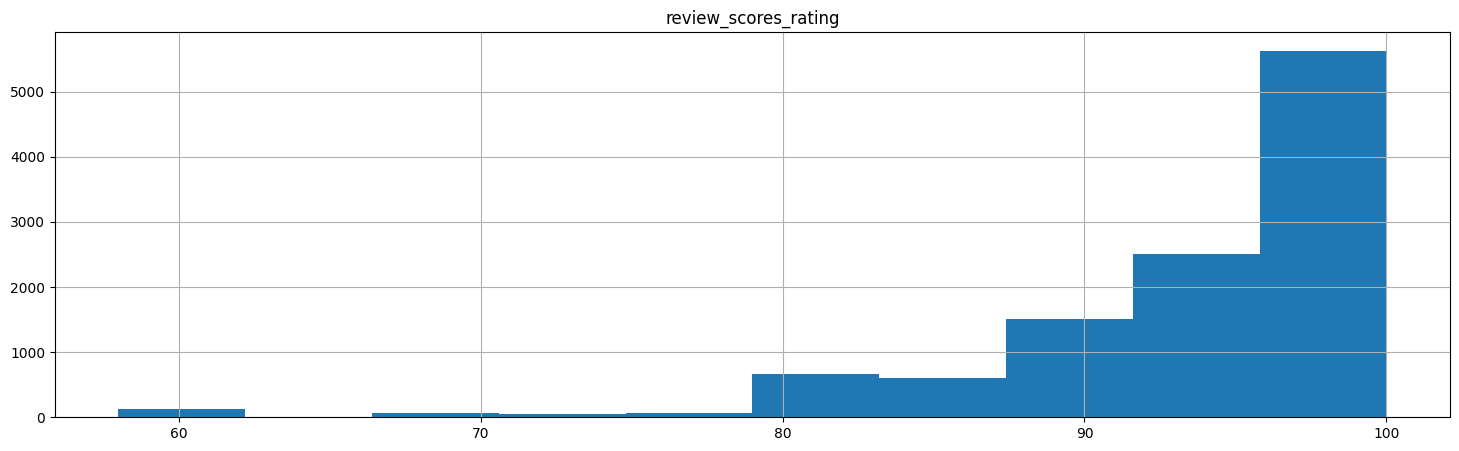

In [ ]:
dfAirbnb.hist(['review_scores_rating'], figsize=(18,5)) # Creates histogram for review score

* The distribution is less skewed after the outlier removal
* There are still some scores between 80-60 but there are enough values to be relevant.

**Step 11: Missing Values Analysis**


In [ ]:
dfAirbnb.isnull().sum()

,0
log_price,0
accommodates,0
bathrooms,30
cleaning_fee,0
city,0
review_scores_rating,2772
bedrooms,32
beds,13


* There are missing values for bathrooms, review_scores_rating, bedrooms, beds.





In [ ]:
# This code was adapted from a post on geeksforgeeks by ankthon available at:
# https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/
dfAirbnb = dfAirbnb.dropna(subset=['bathrooms', 'bedrooms', 'beds', 'review_scores_rating'])


In [ ]:
dfAirbnb.isnull().sum() # Verify null removal

,0
log_price,0
accommodates,0
bathrooms,0
cleaning_fee,0
city,0
review_scores_rating,0
bedrooms,0
beds,0


**Step 12: Feature Selection (Attribute Selection)**

* In this dataset our target variable is continuous there are two relationships to look at

* Continuous Target Variable Vs Continuous Predictor

* Continuous Target Variable Vs Categorical Predictor

**Relationship exploration: Continuous Vs Continuous -- Scatter Charts**

<Axes: title={'center': 'review_scores_rating VS log_price'}, xlabel='review_scores_rating', ylabel='log_price'>

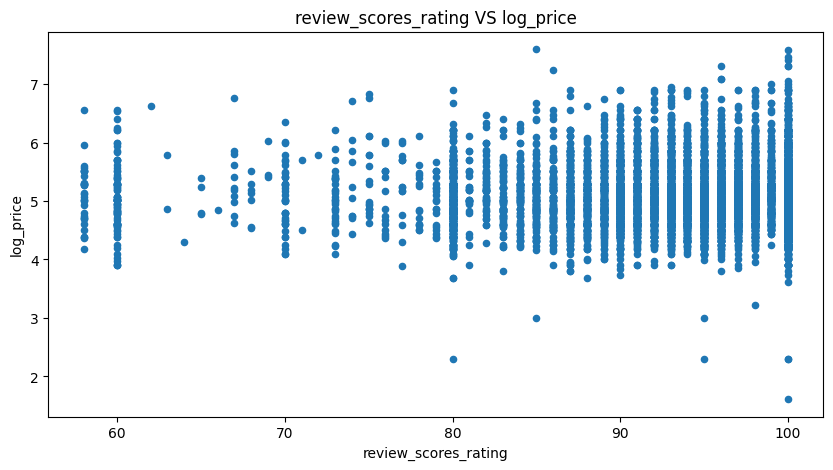

In [ ]:
dfAirbnb.plot.scatter(x='review_scores_rating', y='log_price', figsize=(10, 5), title='review_scores_rating VS log_price') # Creates scatter plot for Review Rating and Price



**Scatter charts interpretation**

* In the scatter chart there is no obvious trend we will need to verify using correlation value.

**Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

In [ ]:

# Calculating correlation matrix
ContinuousCols=['log_price','review_scores_rating']

# Creating the correlation matrix
CorrelationData=dfAirbnb[ContinuousCols].corr()
CorrelationData

,log_price,review_scores_rating
log_price,1.000000,0.025196
review_scores_rating,0.025196,1.000000


**Observations from Step 14**

* There is no signicant correlation between review_scores_rating and log_price.

* We need to remove the review_scores_rating column.

In [ ]:
dfAirbnb.drop(columns=['review_scores_rating'],   axis='columns', inplace=True)
dfAirbnb

,log_price,accommodates,bathrooms,cleaning_fee,city,bedrooms,beds
0,5.010635,3,1.0,True,NYC,1.0,1.0
1,5.129899,7,1.0,True,NYC,3.0,3.0
2,4.976734,5,1.0,True,NYC,1.0,3.0
18,4.882802,2,1.0,True,NYC,1.0,2.0
25,5.003946,6,1.0,True,NYC,3.0,3.0
...,...,...,...,...,...,...,...
74062,4.174387,3,1.0,True,NYC,1.0,1.0
74066,4.753590,2,1.0,True,NYC,1.0,1.0
74070,4.990433,3,1.0,True,NYC,0.0,1.0
74091,5.010635,2,1.0,False,NYC,0.0,1.0


**Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots**

<Axes: title={'center': 'log_price'}, xlabel='beds'>

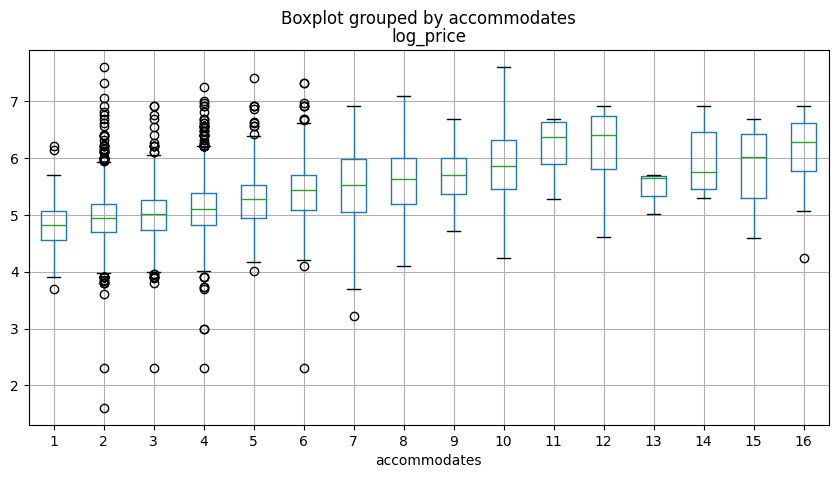

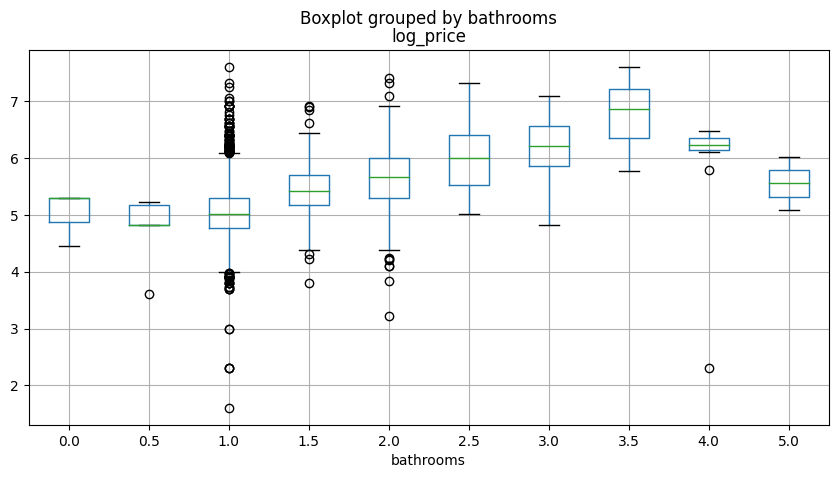

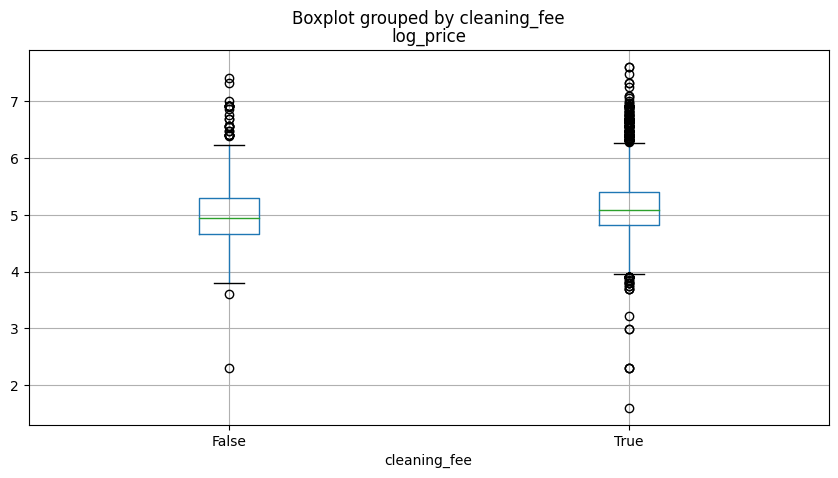

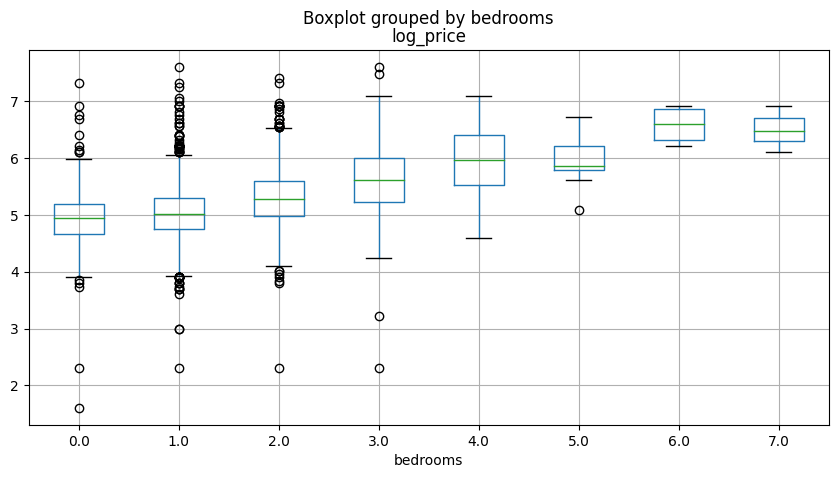

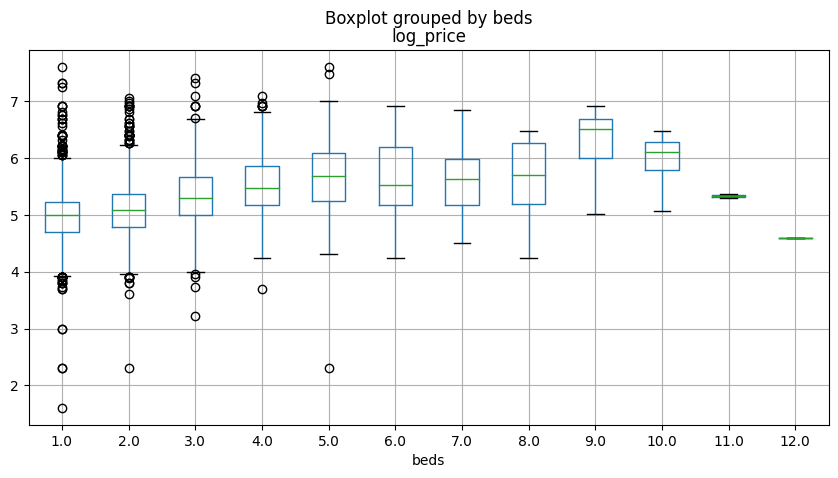

In [ ]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']

import matplotlib.pyplot as plt
dfAirbnb.boxplot(column='log_price', by='accommodates', figsize=(10,5), vert=True)
dfAirbnb.boxplot(column='log_price', by='bathrooms', figsize=(10,5), vert=True)
dfAirbnb.boxplot(column='log_price', by='cleaning_fee', figsize=(10,5), vert=True)
dfAirbnb.boxplot(column='log_price', by='bedrooms', figsize=(10,5), vert=True)
dfAirbnb.boxplot(column='log_price', by='beds', figsize=(10,5), vert=True)


**Observations from Step 15: Box-Plots interpretation**

* accommodates: There is a clear trend of increasing log_price based on how many people the Airbnb accommodates.

* bathrooms: There is a clear trend of increasing log_price based on how many people the Airbnb accommodates.

* cleaning_fee: There is a slight trend of increased log_price for appartments with a true cleaning_fee.

* bedrooms: There is a clear trend of increasing log_price based on how many bedrooms the Airbnb has.

* beds: There is a clear trend of increasing log_price based on how many beds the Airbnb has.



**Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**



In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']
FunctionAnova(inpData=dfAirbnb,
              TargetVariable='log_price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

accommodates is correlated with log_price | P-Value: 0.0
bathrooms is correlated with log_price | P-Value: 0.0
cleaning_fee is correlated with log_price | P-Value: 3.255037079875838e-28
bedrooms is correlated with log_price | P-Value: 0.0
beds is correlated with log_price | P-Value: 0.0


['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']

**Observations from Step 16**

* The results reflect what we saw in the box plots.
* All categorical variables are correlated with the Target variable.
* Final selected Categorical columns: 'accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds'

**Selecting final Predictors/Features for building Machine Learning/AI model.**
* Based on our data column testing can select the folowing columns for our model.
* 'accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds'
* Our predictor columns are all Catagorical.

In [ ]:
SelectedColumns=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']

# Selecting final columns
DataForML=dfAirbnb[SelectedColumns]
DataForML.head()

,accommodates,bathrooms,cleaning_fee,bedrooms,beds
0,3,1.0,True,1.0,1.0
1,7,1.0,True,3.0,3.0
2,5,1.0,True,1.0,3.0
18,2,1.0,True,1.0,2.0
25,6,1.0,True,3.0,3.0


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

**Step 17: Data Pre-processing for Machine Learning Model Building or Model Development**

**Converting the nominal variable to numeric using get_dummies()**

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['log_price']=dfAirbnb['log_price']

# Printing sample rows
DataForML_Numeric.head()

,accommodates,bathrooms,cleaning_fee,bedrooms,beds,log_price
0,3,1.0,True,1.0,1.0,5.010635
1,7,1.0,True,3.0,3.0,5.129899
2,5,1.0,True,1.0,3.0,4.976734
18,2,1.0,True,1.0,2.0,4.882802
25,6,1.0,True,3.0,3.0,5.003946


**Step 18: Machine Learning Model Development:**

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds',
       'log_price'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='log_price'
Predictors=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

**Step 20: Multiple Linear Regression Algorithm For ML/AI model building**

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['log_price']-TestingDataResults['Predictedlog_price']))/TestingDataResults['log_price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.24231483436004775

##### Model Validation and Accuracy Calculations ##########
  accommodates bathrooms cleaning_fee bedrooms beds  log_price  \
0            3       1.0         True      2.0  3.0   4.700480   
1            4       1.0         True      1.0  2.0   5.187386   
2            4       2.0         True      2.0  2.0   6.551080   
3            2       1.0         True      1.0  1.0   4.653960   
4            7       2.0         True      2.0  2.0   6.214608   

   Predictedlog_price  
0                 5.0  
1                 5.0  
2                 6.0  
3                 5.0  
4                 6.0  
Mean Accuracy on test data: 92.98455691348829
Median Accuracy on test data: 94.36958290887742

Accuracy values for 10-fold Cross Validation:
 [93.47561631 93.60896675 93.74427596 93.70244256 93.61771336 93.76127337
 93.51046835 93.1414217  93.65994468 93.37236429]

Final Average Accuracy of the model: 93.56


**Decision Tree Regressor**

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.26115756649282673

##### Model Validation and Accuracy Calculations ##########
  accommodates bathrooms cleaning_fee bedrooms beds  log_price  \
0            3       1.0         True      2.0  3.0   4.700480   
1            4       1.0         True      1.0  2.0   5.187386   
2            4       2.0         True      2.0  2.0   6.551080   
3            2       1.0         True      1.0  1.0   4.653960   
4            7       2.0         True      2.0  2.0   6.214608   

   Predictedlog_price  
0                 5.0  
1                 5.0  
2                 6.0  
3                 5.0  
4                 6.0  
Mean Accuracy on test data: 92.912859970674
Median Accuracy on test data: 94.36958290887742

Accuracy values for 10-fold Cross Validation:
 [93.42238487 93.63280147 93.7061193  93.68941728 93.59552938 93.75059822
 93.55432493 93.110724   93.62914672 93.3808343 ]

Final Average Accuracy of the model: 93.55


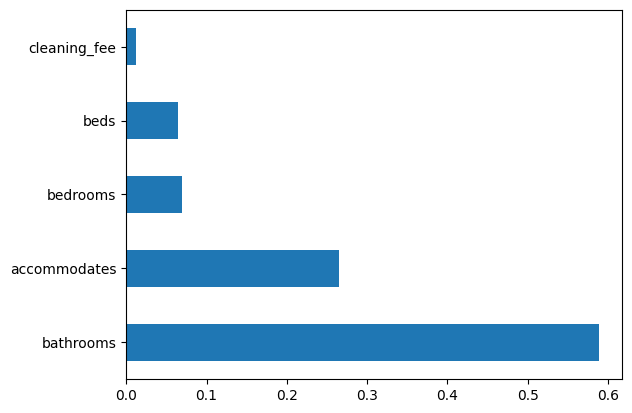

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')


# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['log_price']-TestingDataResults['Predictedlog_price']))/TestingDataResults['log_price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting/Visualising the Decision Tree**

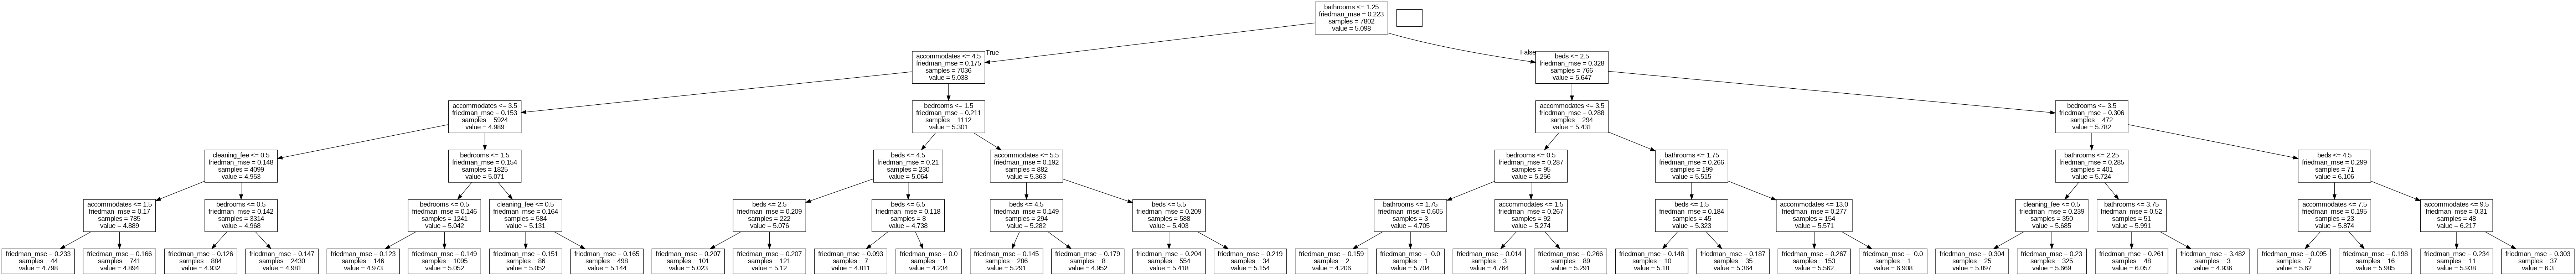

In [ ]:
# This code was adapted from a post on the stackoverflow forum by Rahul Deshmukh available at:
# https://stackoverflow.com/questions/59074364/keyerror-while-fitting-data-to-decisiontreeregressor
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, feature_names=Predictors, class_names=None) # Change class_names to None for regression

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

**XGBoost Regressor**

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.29352846905216745

##### Model Validation and Accuracy Calculations ##########
  accommodates bathrooms cleaning_fee bedrooms beds  log_price  \
0            3       1.0         True      2.0  3.0   4.700480   
1            4       1.0 

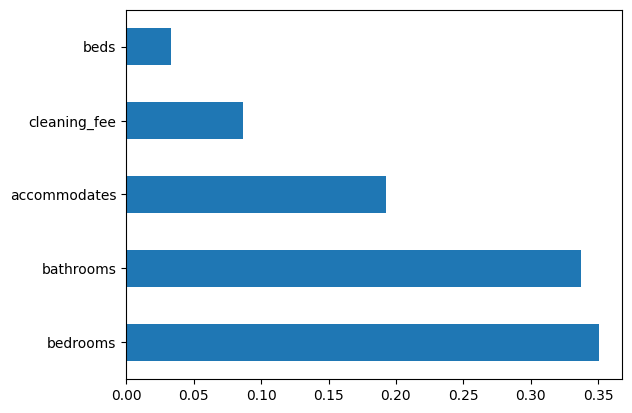

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['log_price']-TestingDataResults['Predictedlog_price']))/TestingDataResults['log_price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Step 21: Model Deployment**

* From the results of the 3 algorithms tested XGboost scored the highest accuaracy and will be selected for the model development.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='log_price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(11146, 5)
(11146,)


**Cross validating the final model accuracy with less predictors**

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [93.4906806  93.62524146 93.7907928  93.70318646 93.64497614 93.77790833
 93.53325602 93.20541602 93.62650251 93.40535163]

Final Average Accuracy of the model: 93.58


**Step 22: Retraining the final model using 100% data**

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

**Step 23: Save the model as a serialized file which can be stored anywhere**

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


**Step 24: Create a python function**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):

    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Loading the Function from pickle file

    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Airbnb Price Prediction'])
    return(PredictionResult)
    print(PredictionResult)


# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[3, 1, 1, 2, 3],[4, 2, 0, 4, 4]],columns=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds'])
print(NewSampleData)
# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)


   accommodates  bathrooms  cleaning_fee  bedrooms  beds
0             3          1             1         2     3
1             4          2             0         4     4


,Airbnb Price Prediction
0,4.858190
1,4.179966


**Step 25: Calling the function for some new data**

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[3, 1, 1, 2, 3],[4, 2, 0, 4, 4]],columns=['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   accommodates  bathrooms  cleaning_fee  bedrooms  beds
0             3          1             1         2     3
1             4          2             0         4     4


,Airbnb Price Prediction
0,4.858190
1,4.179966


**Step 26: Desktop App deployment: Tkinter package**
* Needs to be run in Pycharm to function.

In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class AirbnbPricePredictionApp:  # Creates the class
    def __init__(self, master):  # Gui initialisation
        self.master = master
        self.master.title('NYC Airbnb Price Prediction')

        # Increase application size
        self.master.geometry("500x400")

        # Add a title at the top
        title_label = tk.Label(self.master, text='NYC Airbnb Price Prediction', font=('Arial', 16))
        title_label.pack(pady=10)

        # Load the Airbnb data
        self.data = pd.read_csv('train.csv')
        self.features = ['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds']
        self.X = self.data[self.features].values
        self.y = self.data['log_price'].values

        # Split the data into training and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # The XGBRegressor model is used as tested in colab
        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        # Create a frame for padding
        self.frame = tk.Frame(self.master, padx=20, pady=20)
        self.frame.pack()

        # Create GUI widgets
        self.widgets = []  # Creates list for gui widgets
        self.create_widgets()  # Calls the create widget function

    def create_widgets(self):  # This function creates widgets for each predictor column in the GUI
        for i, column in enumerate(self.features):  # For all predictor columns
            label = tk.Label(self.frame, text=column + ': ')
            label.grid(row=i, column=0, sticky='w')

            if column == 'cleaning_fee':  # Check if column is cleaning fee as it is a boolean it needs a checkbox
                var = tk.BooleanVar()
                checkbox = tk.Checkbutton(self.frame, variable=var)
                checkbox.grid(row=i, column=1, padx=10, pady=5)
                self.widgets.append(var)
            else:  # This code creates the number slider GUI based on the min and max values from the data column
                current_val_label = tk.Label(self.frame, text='0.0')
                current_val_label.grid(row=i, column=2)
                slider = ttk.Scale(self.frame, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                                   command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
                slider.grid(row=i, column=1, padx=10, pady=5)
                self.widgets.append(slider)

        # Creates predict button
        predict_button = tk.Button(self.frame, text='Predict Airbnb Price', command=self.predict_price)
        predict_button.grid(row=len(self.features), columnspan=3, pady=10)

        # Label to display prediction below the button
        self.prediction_label = tk.Label(self.frame, text='', font=('Arial', 14), fg='blue')
        self.prediction_label.grid(row=len(self.features) + 1, columnspan=3, pady=10)

    def predict_price(self):  # This function is called when the predict button is pressed and runs the prediction
        inputs = []
        for widget in self.widgets:
            if isinstance(widget, tk.BooleanVar):
                inputs.append(float(widget.get()))
            else:
                inputs.append(float(widget.get()))

        predicted_close = self.model.predict([inputs])  # Runs the algorithm for the inputs
        # Displays in the GUI label
        self.prediction_label.config(text=f'Predicted NYC Airbnb Price: ${predicted_close[0]:.2f}k per week')

if __name__ == '__main__':
    root = tk.Tk()
    app = AirbnbPricePredictionApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable